# Installing pytesseract and poppler libraries

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pdf2image
!apt-get install poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!pip install spacy

# Importing necessary Libraries

In [ ]:
import spacy
import random
import pandas as pd
from spacy.util import minibatch, compounding
from spacy.training.example import Example
from spacy import displacy
from spacy.tokens import DocBin
from tqdm import tqdm
import glob
import pytesseract
from pdf2image import convert_from_path
import re
import csv

# Importing the libraries to train the model

In [ ]:
try:
    import json
    import os

    import pandas as  pd
    import spacy

    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob

    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re


    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline

    import matplotlib.pyplot as plt
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
    from sklearn import svm
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    import seaborn as sns
    from imblearn.over_sampling import SMOTE

    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer

    import swifter

    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

Error : No module named 'swifter' 


# Downloading the nltk library

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Loading the dataset

In [ ]:
df = pd.read_csv("Categorising Modules for prediction.csv")
df.head(5)

,Skill Area,Module Title,Module Keywords
0,Programming and Software Development,Secure Coding in Perl,"Perl programming language, Secure coding pract..."
1,Data Science and Analytics,Data Visualization for Project Management,"Data visualization, Project management, Visual..."
2,Database Management,Database Capacity Planning and Forecasting,"Database capacity planning, Database forecasti..."
3,Programming and Software Development,Secure Coding in PHP,"Secure coding, PHP programming, Web applicatio..."
4,Database Management,Database Audit and Compliance Procedures,"Database audit, Compliance procedures, Data go..."


# Visualising the dataset

In [ ]:
df.groupby('Skill Area').describe()

Module Title         \
                                                    count unique   
Skill Area                                                         
Artificial Intelligence and Machine Learning          672    587   
Cloud Computing                                       766    594   
Cybersecurity                                         871    753   
Data Science and Analytics                            695    609   
Database Management                                  1000    486   
IT Infrastructure and Networking                      858    621   
Programming and Software Development                  728    500   
Project Management                                    750    589   
System Administration                                 936    568   
User Experience and Design                            499    362   

                                                                                                 \
                                                                                            top   
Skill Area                                                                                        
Artificial Intelligence and Machine Learning                        Deep Reinforcement Learning   
Cloud Computing                                       Cloud Data Extraction and Loading Methods   
Cybersecurity                                   Incident Response Plan Documentation and Review   
Data Science and Analytics                           Data Visualization with Sentiment Analysis   
Database Management                                     Database Backup and Recovery Strategies   
IT Infrastructure and Networking                          Network Service Deployment Management   
Programming and Software Development            Cloud Serverless Computing with Azure Functions   
Project Management                            Project Integration Management Techniques and ...   
System Administration                         Network Load Balancer Configuration and Troubl...   
User Experience and Design                             Designing for Art and Creative Platforms   

                                                  Module Keywords         \
                                             freq           count unique   
Skill Area                                                                 
Artificial Intelligence and Machine Learning    4             672    600   
Cloud Computing                                10             766    623   
Cybersecurity                                   4             871    774   
Data Science and Analytics                      4             695    632   
Database Management                            18            1000    553   
IT Infrastructure and Networking                8             858    651   
Programming and Software Development            4             728    548   
Project Management                              5             750    632   
System Administration                           8             936    634   
User Experience and Design                      7             499    376   

                                                                                                 \
                                                                                            top   
Skill Area                                                                                        
Artificial Intelligence and Machine Learning                  Decision Trees and Random Forests   
Cloud Computing                                       Cloud Data Extraction and Loading Methods   
Cybersecurity                                 Security Operations Center (SOC) Data Analysis...   
Data Science and Analytics                           Data Visualization with Sentiment Analysis   
Database Management                                          NoSQL Database Concepts and Design   
IT Infrastructure and Networking                             Network Service Release Manage

# Visualising the count of the dataset

<Axes: >

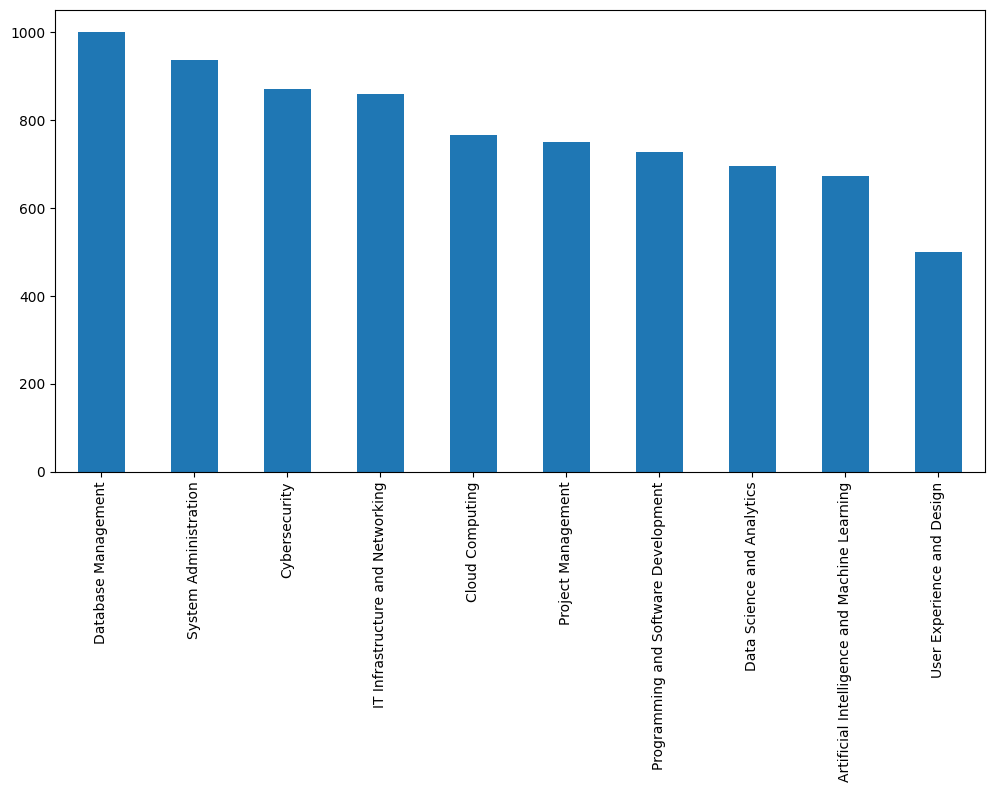

In [ ]:
df['Skill Area'].value_counts().plot( kind='bar', figsize=(12,6))

# Exploring the dataset

In [ ]:
#Explore the data types of the columns
df.dtypes

Skill Area         object
Module Title       object
Module Keywords    object
dtype: object

In [ ]:
#Checking for null values
df.isnull().sum()

Skill Area         0
Module Title       0
Module Keywords    0
dtype: int64

In [ ]:
df.shape

(7775, 3)

In [ ]:
print(df['Module Title'].apply(lambda x: len(x.split(' '))).sum())
print(df['Module Keywords'].apply(lambda x: len(x.split(' '))).sum())

39346
41744


# Preprocessing the dataset

In [ ]:
nltk.download('stopwords')

special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    text = text.lower()
    # text = special_character_remover.sub(' ', text)
    # text = extra_symbol_remover.sub('', text)
    # text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

df['Module Title'] = df['Module Title'].apply(clean_text)
df['Module Keywords'] = df['Module Keywords'].apply(clean_text)

In [ ]:
print(df['Module Title'].apply(lambda x: len(x.split(' '))).sum())
print(df['Module Keywords'].apply(lambda x: len(x.split(' '))).sum())

39346
41744


# Splitting the dataset into training and testing

In [ ]:
# # Splitting the dataset into training and testing
# from sklearn.model_selection import train_test_split
# x = df['Module Title'].str.lower() + ' ' + df['Module Keywords'].str.lower()
# y = df['Skill Area']
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# # Encode class labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
!pip install transformers

# Applying the Logistic Regression algorithm to train the model

In [ ]:
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Train Word2Vec model
sentences = [text.split() for text in x_train]
word2vec_model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Create document vectors using Word2Vec
document_vectors = []
for text in sentences:
    vectors = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
    if vectors:
        document_vectors.append(sum(vectors) / len(vectors))
    else:
        document_vectors.append([0] * 100)

import numpy as np

# Create document vectors using Word2Vec
document_vectors = [np.mean([word2vec_model.wv[word] for word in sentence], axis=0) for sentence in sentences]

# Convert document vectors to numpy array
X_train = np.array(document_vectors)

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


# Split into training and testing data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train_encoded)

# Predict and evaluate
X_test_vectors = []
for text in x_test:
    vectors = [word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv]
    if vectors:
        X_test_vectors.append(sum(vectors) / len(vectors))
    else:
        X_test_vectors.append([0] * 100)
X_test_vectors = np.array(X_test_vectors)

y_pred_encoded = classifier.predict(X_test_vectors)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7627


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Applying the Naive Bayes algorithm to train the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create the pipeline
naivebayes = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Fit the pipeline
naivebayes.fit(x_train, y_train_encoded)

# Predict and evaluate
y_pred_encoded = naivebayes.predict(x_test)

# Decode predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7987138263665595


# Applying the XGBoost Algorithm to train the model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

xgboost = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', XGBClassifier())
])

xgboost.fit(x_train, y_train_encoded)

y_pred_encoded = xgboost.predict(x_test)

# Decode predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8823151125401929


# Applying the Random Forest Algorithm to train the model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preprocess the data
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub('[/(){}\[\]\|@,;]', ' ', text)
    text = re.sub('[^0-9a-z #+_]', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

df['Module Title'] = df['Module Title'].apply(clean_text)
df['Module Keywords'] = df['Module Keywords'].apply(clean_text)

# Split the dataset into training and testing
x = df['Module Title'].str.lower() + ' ' + df['Module Keywords'].str.lower()
y = df['Skill Area']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize CountVectorizer
countvect = CountVectorizer()

# Prepare the feature matrix
x_train_encoded = countvect.fit_transform(x_train.tolist())
x_test_encoded = countvect.transform(x_test.tolist())

# Train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train_encoded, y_train)  # Use y_train instead of y_train_encoded

# Predict on the test set
y_pred = random_forest.predict(x_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8803858520900322


# Applying the SVM model

Accuracy: 0.884887459807074


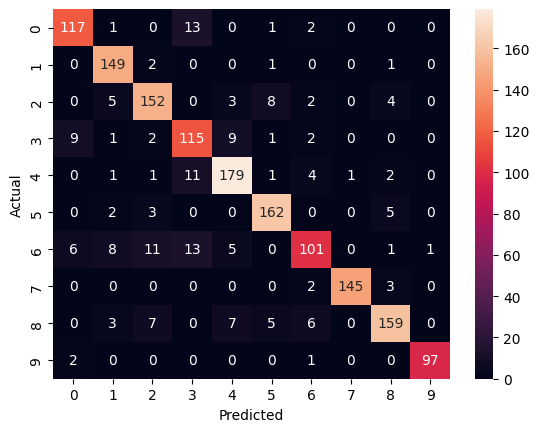

                                              precision    recall  f1-score   support

Artificial Intelligence and Machine Learning       0.87      0.87      0.87       134
                             Cloud Computing       0.88      0.97      0.92       153
                               Cybersecurity       0.85      0.87      0.86       174
                  Data Science and Analytics       0.76      0.83      0.79       139
                         Database Management       0.88      0.90      0.89       200
            IT Infrastructure and Networking       0.91      0.94      0.92       172
        Programming and Software Development       0.84      0.69      0.76       146
                          Project Management       0.99      0.97      0.98       150
                       System Administration       0.91      0.85      0.88       187
                  User Experience and Design       0.99      0.97      0.98       100

                                    accuracy        

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x = df['Module Title'].str.lower() + ' ' + df['Module Keywords'].str.lower()
y = df['Skill Area']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Initialize CountVectorizer
countvect = CountVectorizer()

# Transform text data into vectors
x_train_vect = countvect.fit_transform(x_train)
x_test_vect = countvect.transform(x_test)

# Create an instance of RandomOverSampler
random_oversampler = RandomOverSampler(sampling_strategy='auto', random_state=0)

# Apply SMOTE to the vectorized data
X_train = pd.DataFrame(x_train_vect)
x_resample, y_resample = SMOTE().fit_resample(x_train_vect, y_train)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=0)
svm_model.fit(x_resample, y_resample)

# Predict and evaluate
prediction = svm_model.predict(x_test_vect)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(classification_report(y_test, prediction))



In [ ]:
new_svm_model = svm.SVC(kernel='linear',random_state=0)
score = cross_val_score(new_svm_model,x_resample,y_resample,cv=3)
np.mean(score)

0.8947539659568061

In [ ]:
#fitting the new model
new_svm_model.fit(x_resample,y_resample)

SVC(kernel='linear', random_state=0)

# Saving the model

In [ ]:
import pickle

# Assuming you have a trained model object named 'model'
# Save the model to a file

with open('skill_prediction.pkl', 'wb') as file:
    pickle.dump((new_svm_model, countvect),  file)


In [ ]:
# import joblib

# # Save the model to a file
# joblib.dump(new_svm_model, 'skill_prediction.joblib')
